# Dependencies <a class="anchor" id="top"></a>

In [1]:
import pandas as pd
import Procedatos as P
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import choice
from scipy.stats import kurtosis, skew
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# List of figures

1. [Figure 1](#fig1)
2. [Figure 2](#fig2)
3. [Figure 3](#fig3)
4. [Figure 4](#fig4)
5. [Figure 5](#fig5)
6. [Figure 6](#fig6)
7. [Figure 7](#fig7)
8. [Figure 8](#fig8)
9. [Figure 9](#fig9)

## Figure 1 <a class="anchor" id="fig1"></a>

([Back to top](#top))

Variation of the measurements depending on the parameter $k$. The value of the performance measures is presented for a model with memory 12 ($d\,{=}\,12$) where we have varied the number of predictors $k$ in the set of values $\{1,3 ,6,9,12\}$.In the first panel from left to right the Attendance is presented, in the second the Efficiency, in the third the Inaccuracy and in the fourth the Deviation. Error bars represent a 95\% confidence interval.

In [2]:
def figura1(degrees=0, to_file=False):
    comp1 = '# of predictors (k)'
    variables = ['Attendance', 'Efficiency', 'Inaccuracy', 'Deviation']
    sweep1 = P.leer_datos([12],[1,3,6,9,12],[100],[100],
                    verb=False,muchos=False,cola=True,espejos=False)
    sweep1['Modelo'] = sweep1['Num_predic']
    data = P.merge_modelos(sweep1)
    size = 2.2
    fig, ax = plt.subplots(1,4, figsize=(size*4,size), tight_layout=True, dpi=300)
    for i, v in enumerate(variables):
        sns.lineplot(x='Modelo',y=v,data=data,ax=ax[i],err_style="bars",ci=95)
        ax[i].set_ylabel(v)
        ax[i].set_xlabel(comp1)
        ax[i].tick_params(labelrotation=degrees)
        ax[i].set_xticks([1,3,6,9,12])
        ax[i].set_title(v + ' (d=12)')
        ax[i].grid()
    if to_file:
        plt.savefig('Figura1.png', dpi=300)
        print("Imagen guardada!")


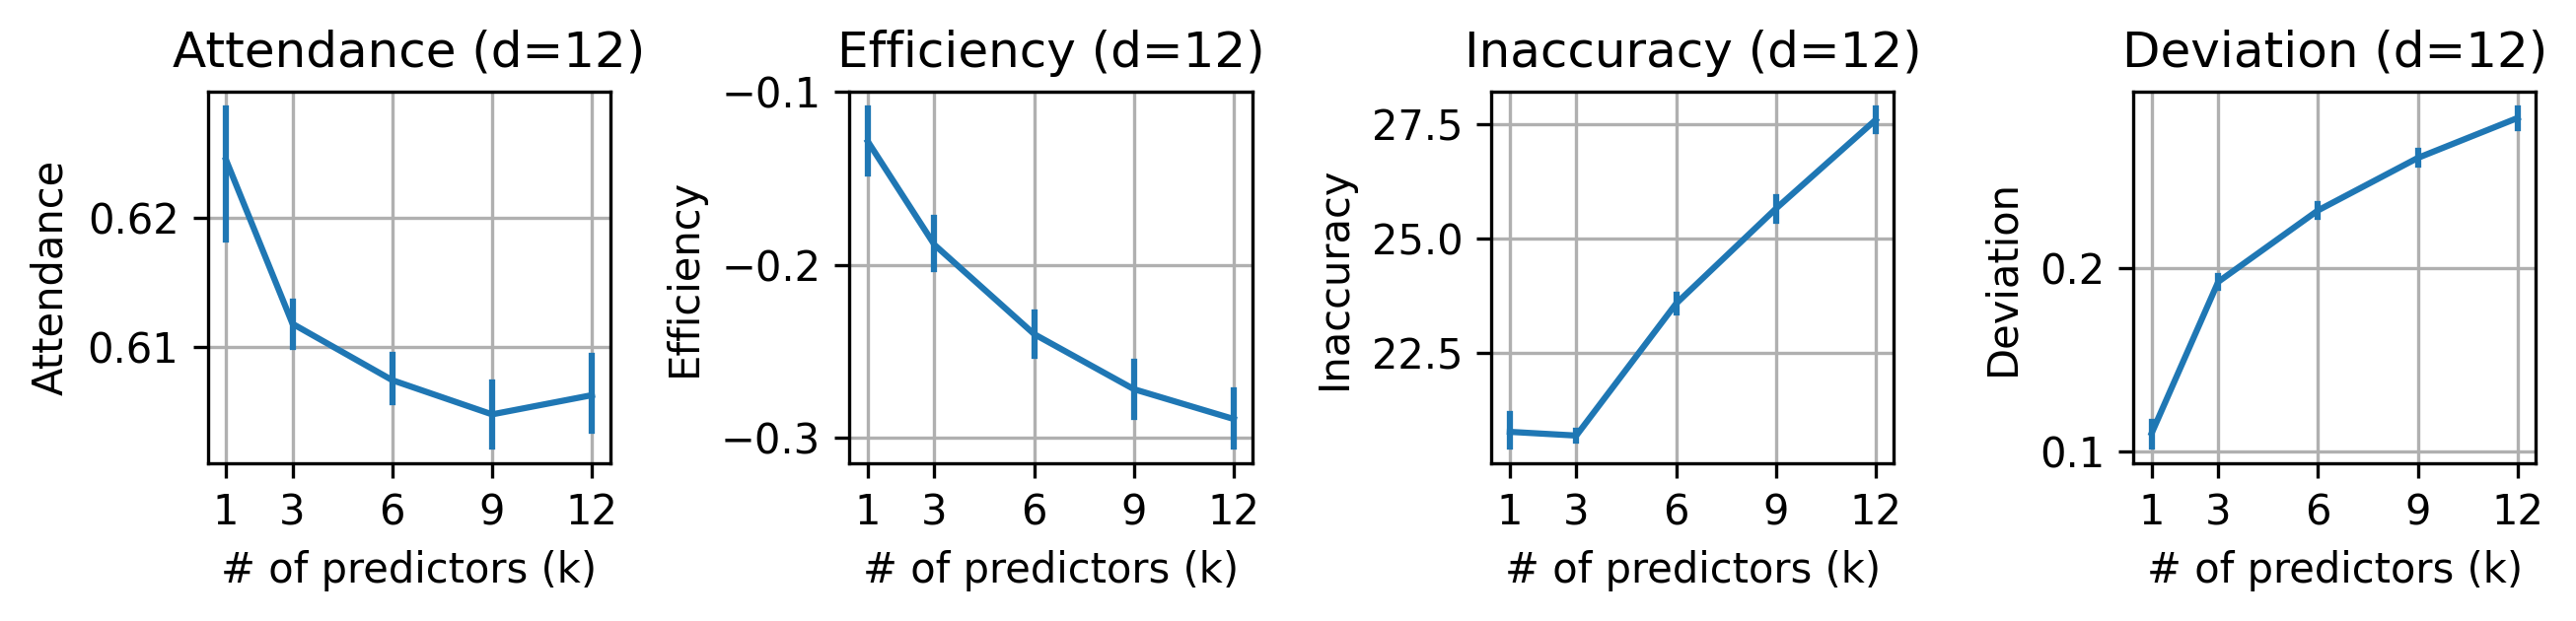

In [3]:
figura1(to_file=True)

---

# Figure 2 <a class="anchor" id="fig2"></a>

([Back to top](#top))

Example of the dynamics per round observed in an arbitrary trial, for a model with $k\,{=}\,1$. Each row represents a round $t$ (with $t=84,\ldots, 88$) in a typical trial taken from the 100 simulations. The left panel presents the distribution of the predictions $s(t)$ of the active predictors of the agents. The middle panel shows the number of agents who make either the decision to go or not to go to the bar. The right panel shows the distribution of the distances between the predictions and the attendance of the round, that is $|s(t)-A_t|$ for each active predictor $s$.

In [4]:
def graficar(data, trial=0, r_ini=84, n_rounds=5, k=0, to_file=False, nombre=2):
    ids = list(data['Identificador'].unique())
    # ident = choice(ids)
    ident = ids[trial]
    inicial = True
    fig, ax = plt.subplots(n_rounds,3, figsize=(8,2*n_rounds), tight_layout=True, dpi=300)
    fig.suptitle(f'Rounds {r_ini} through {r_ini + n_rounds - 1} (k={k})', fontsize=14)
    for r in range(n_rounds):
        if inicial:
            ax[r,0].set_title(f'Distribution of\nPredictions from\nactive predictors')
            ax[r,1].set_title(f'Decisions')
            ax[r,2].set_title('Distribution of\ndistances between\nPrediction and Attendance')
            inicial = False
        else:
            ax[r,0].set_title('')
            ax[r,1].set_title('')
            ax[r,2].set_title('')
        df = pd.DataFrame(data[data['Ronda'] == r_ini+r])
        df['Asistencia'] = df.groupby('Identificador')['Estado'].transform('sum')
        df['Estado1'] = df['Estado'].apply(lambda x: 'Go' if x == 1 else 'No go')
        df = pd.DataFrame(df[df['Identificador'] == ident])
        df['|P-A|'] = np.abs(df['Prediccion_lag'] - df['Asistencia'])
        sns.histplot(x='Prediccion_lag', data=df, kde=True, ax=ax[r,0], bins=50)
        sns.countplot(x='Estado1', order=['Go', 'No go'], data=df, ax=ax[r,1])
        sns.histplot(x='|P-A|', data=df, kde=True, ax=ax[r,2])
        ax[r,0].set_xlim([0,100])
        ax[r,0].set_xlabel('')
        ax[r,0].axvline(60, ls='--', color='red')
        ax[r,1].set_ylim([0,100])
        ax[r,1].set_xlabel('')
        ax[r,1].axhline(60, ls='--', color='red')
        ax[r,1].set_ylabel('')
#        ax[r,1].tick_params(labelleft=False)
        ax[r,2].set_xlim([0,100])
        ax[r,2].set_xlabel('')
        ax[r,2].set_ylabel('')
#        ax[r,2].tick_params(labelleft=False)
    if to_file:
        plt.savefig(f'Figura{nombre}.png', dpi=300)
        print("Imagen guardada!")
    
def figuras2y3(k, to_file=False, nombre=2):
    df = P.leer_datos([12],[k],[100],[100], 
                       verb=False,muchos=False,cola=False,espejos=False)
    df['Prediccion_lag'] = df.groupby(['Identificador','Agente'])['Prediccion'].transform('shift',1)
    df['Attendance'] = df.groupby(['Identificador','Ronda'])['Estado'].transform('sum')
    trial=10
    r_ini=84
    n_rounds=5
    graficar(data=df, 
             trial=trial, 
             r_ini=r_ini, 
             n_rounds=n_rounds, 
             k=k,
             to_file=to_file,
             nombre=nombre
            )


Imagen guardada!


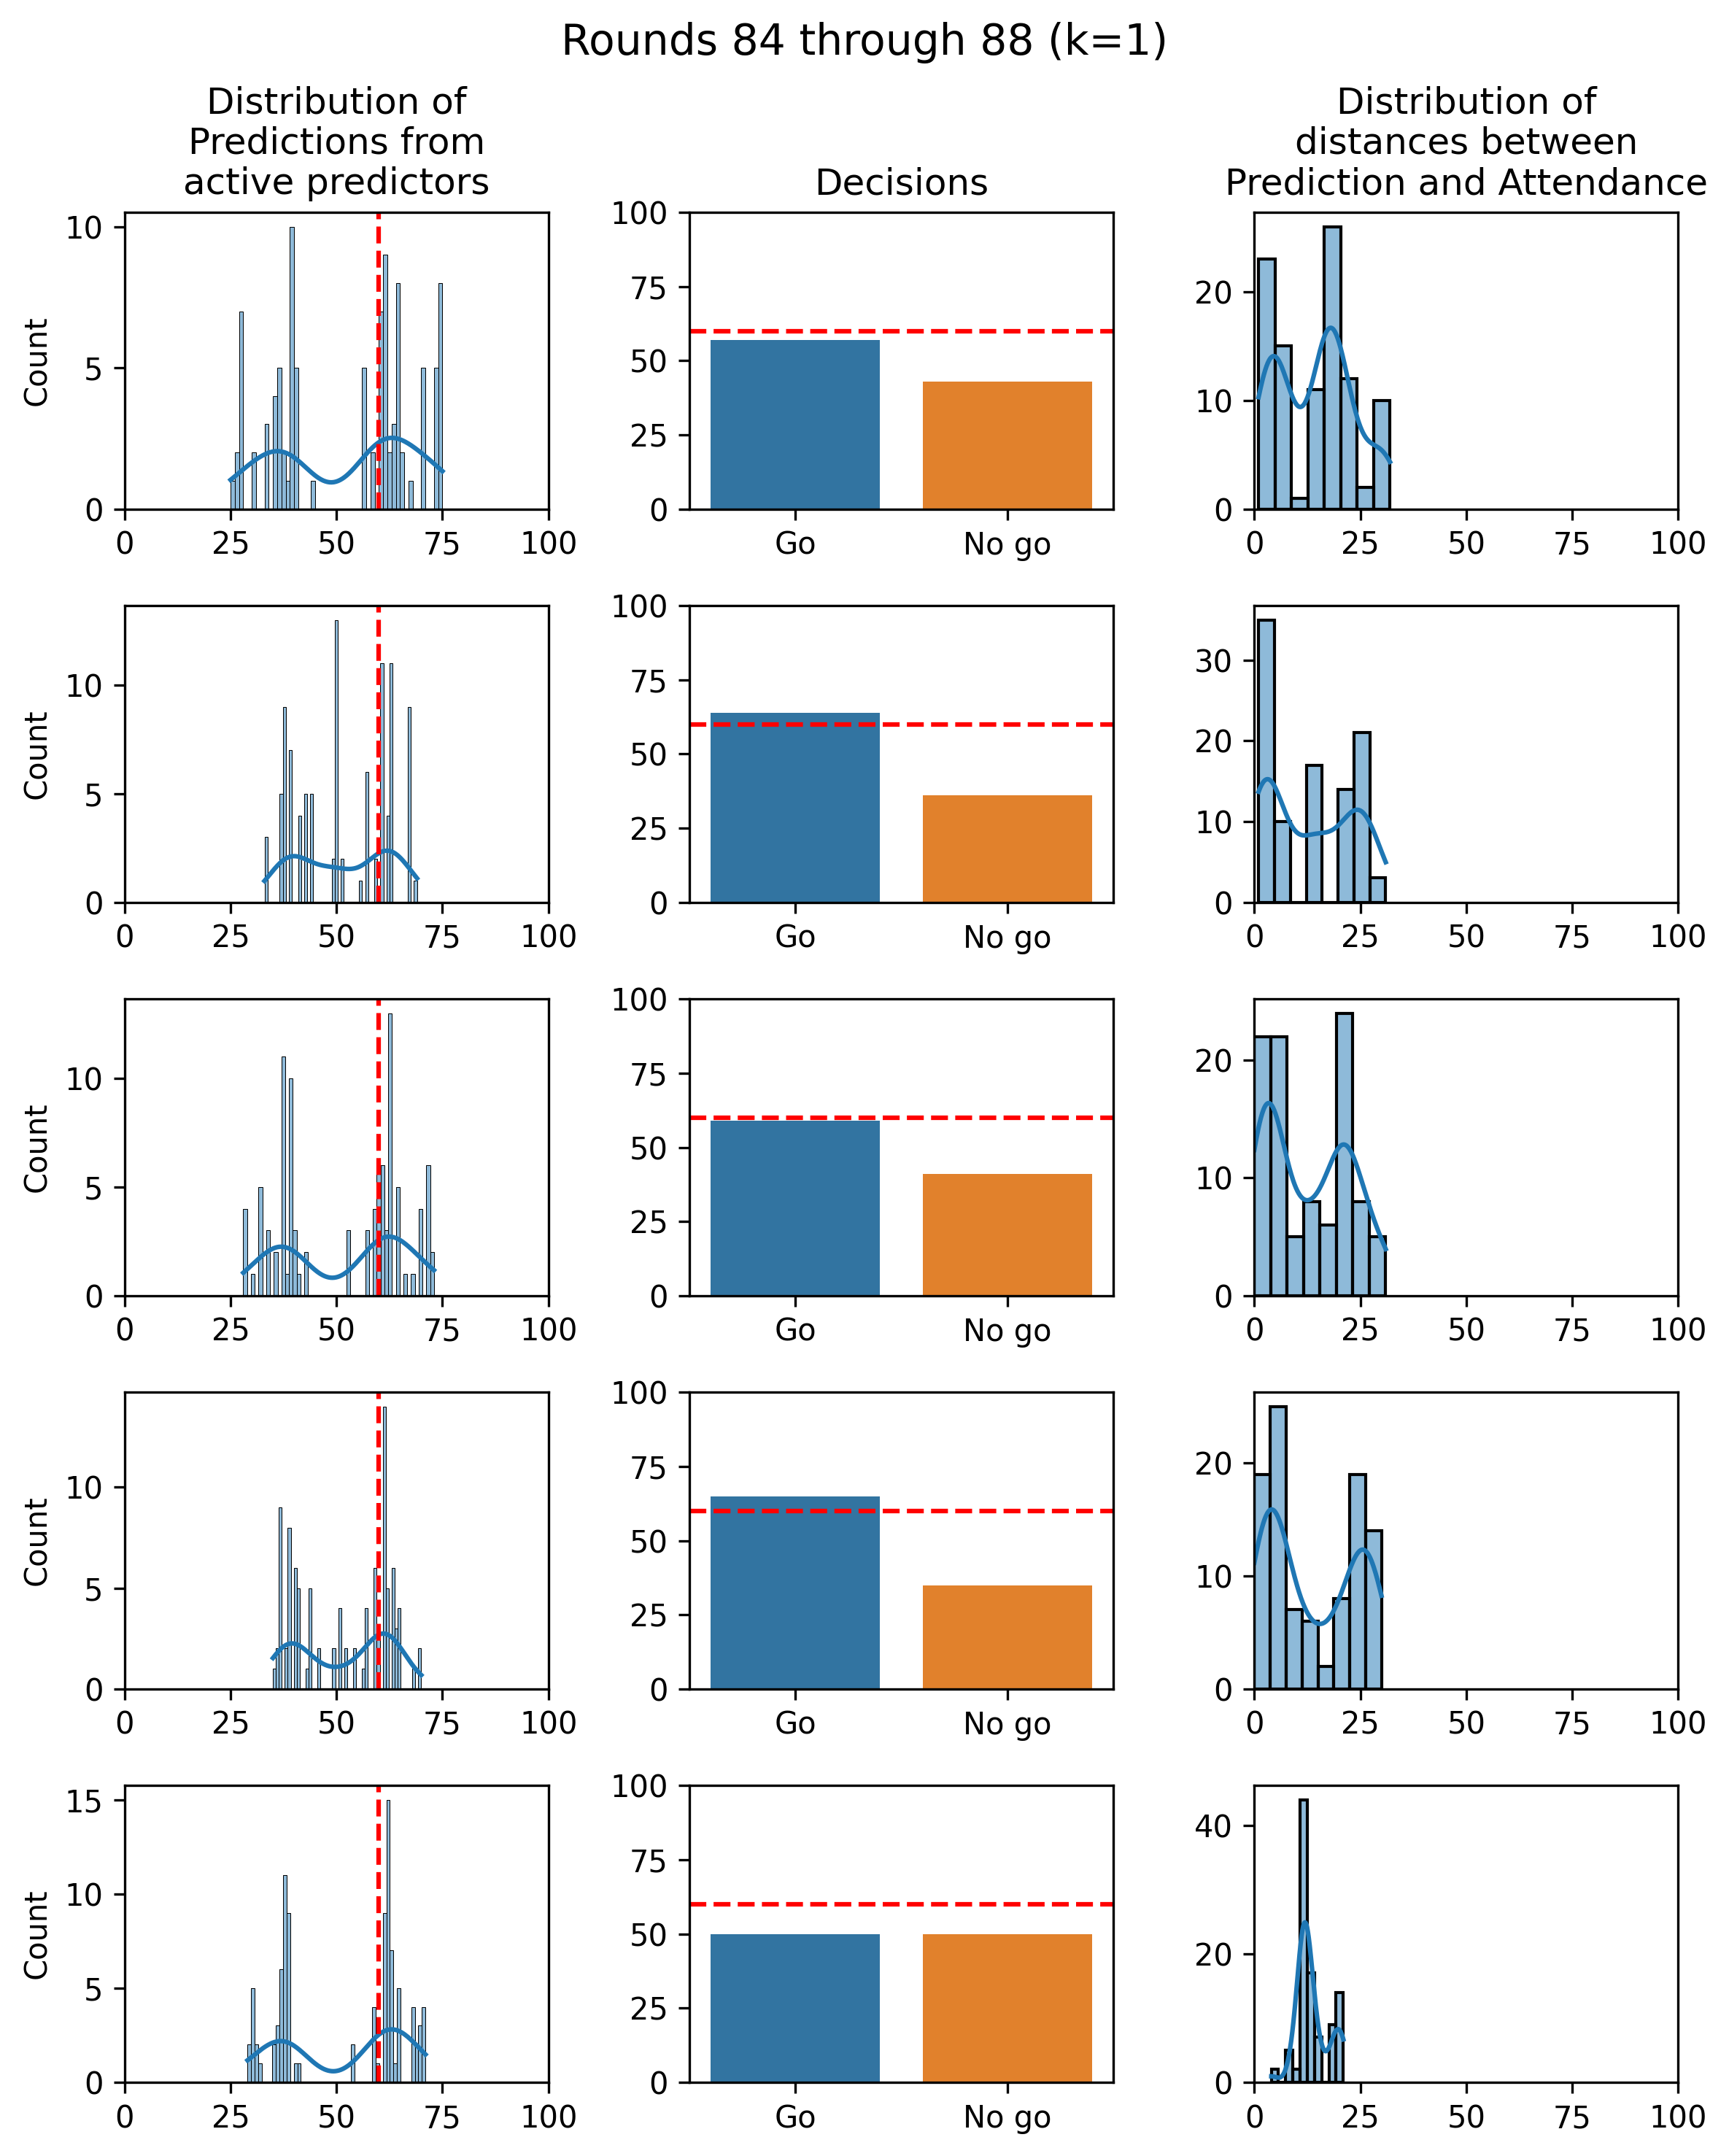

In [5]:
figuras2y3(k=1, to_file=True, nombre=2)

---

# Figure 3 <a class="anchor" id="fig3"></a>

([Back to top](#top))

Example of the dynamics per round observed in an arbitrary trial, for a model with $k\,{=}\,12$. Each row represents a round $t$ (with $t=84,\ldots, 88$) in a typical trial taken from the 100 simulations. The left panel presents the distribution of the predictions $s(t)$ of the active predictors of the agents. The middle panel shows the number of agents who make either the decision to go or not to go to the bar. The right panel shows the distribution of the distances between the predictions and the attendance of the round, that is $|s(t)-A_t|$ for each active predictor $s$.

Imagen guardada!


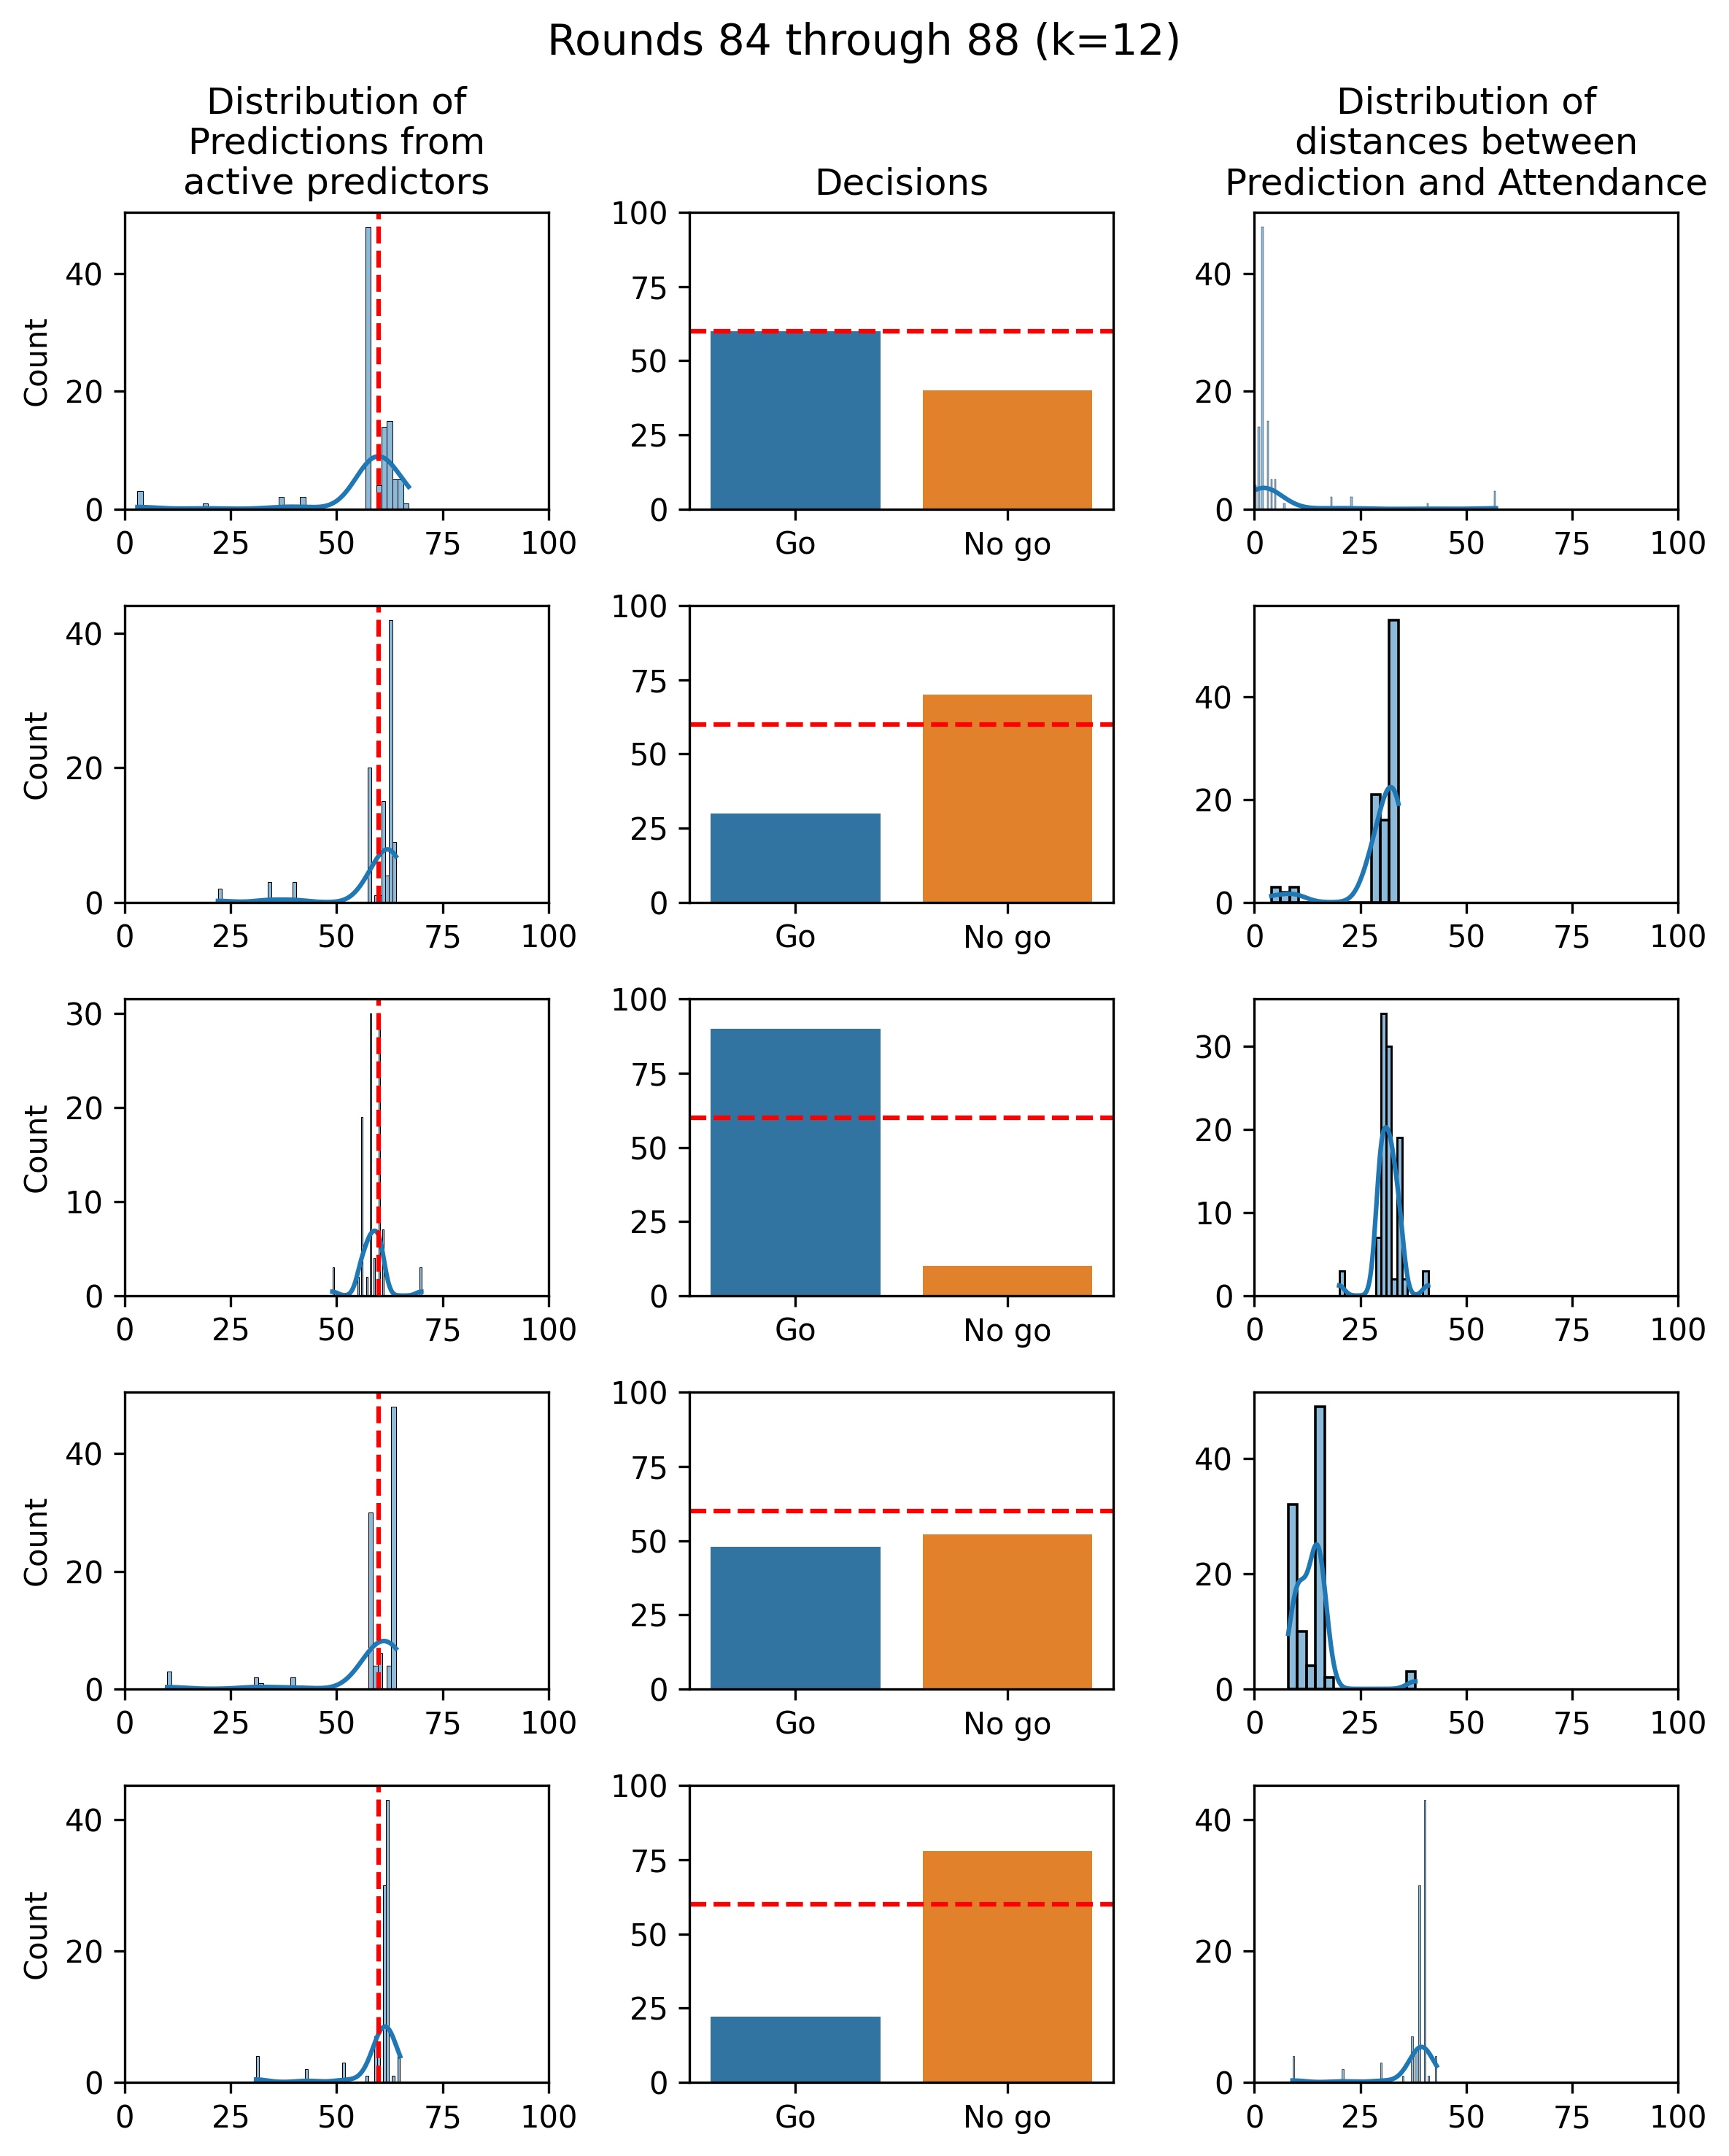

In [6]:
figuras2y3(k=12, to_file=True, nombre=3)

---

# Figure 4 <a class="anchor" id="fig4"></a>

([Back to top](#top))

$\Delta m$ vs.~round for each model with $k\,{=}\,1,3,12$.

In [13]:
def figura4(trial=0, to_file=False):
    df1 = P.leer_datos([12],[1],[100],[100], 
                       verb=False,muchos=False,cola=False,espejos=False)
    df1['Prediccion_lag'] = df1.groupby(['Identificador','Agente'])['Prediccion'].transform('shift',1)
    df1['Attendance'] = df1.groupby(['Identificador','Ronda'])['Estado'].transform('sum')
    # df1.head()
    df12 = P.leer_datos([12],[3],[100],[100], 
                        verb=False,muchos=False,cola=False,espejos=False)
    df12['Prediccion_lag'] = df12.groupby(['Identificador','Agente'])['Prediccion'].transform('shift',1)
    df12['Attendance'] = df12.groupby(['Identificador','Ronda'])['Estado'].transform('sum')
    # df12.head()
    df13 = P.leer_datos([12],[12],[100],[100], 
                        verb=False,muchos=False,cola=False,espejos=False)
    df13['Prediccion_lag'] = df13.groupby(['Identificador','Agente'])['Prediccion'].transform('shift',1)
    df13['Attendance'] = df13.groupby(['Identificador','Ronda'])['Estado'].transform('sum')
    # df13.head()
    # Filtering dataframes for trial
    ids = list(df1['Identificador'].unique())
    ident = ids[trial]
    dfA = pd.DataFrame(df1[df1['Identificador'] == ident])
    ids = list(df12['Identificador'].unique())
    ident = ids[trial]
    dfB = pd.DataFrame(df12[df12['Identificador'] == ident])
    ids = list(df13['Identificador'].unique())
    ident = ids[trial]
    dfC = pd.DataFrame(df13[df13['Identificador'] == ident])
    # Obtaining variables to draw
    df1A = dfA.groupby('Ronda')['Prediccion_lag'].value_counts().reset_index(name='Conteo')
    df2A = df1A.groupby('Ronda').apply(lambda x: P.diferencia(list(x['Prediccion_lag']), list(x['Conteo']))).reset_index()
    df2A.columns = ['Ronda','Dif_modes']
    df1B = dfB.groupby('Ronda')['Prediccion_lag'].value_counts().reset_index(name='Conteo')
    df2B = df1B.groupby('Ronda').apply(lambda x: P.diferencia(list(x['Prediccion_lag']), list(x['Conteo']))).reset_index()
    df2B.columns = ['Ronda','Dif_modes']
    df1C = dfC.groupby('Ronda')['Prediccion_lag'].value_counts().reset_index(name='Conteo')
    df2C = df1C.groupby('Ronda').apply(lambda x: P.diferencia(list(x['Prediccion_lag']), list(x['Conteo']))).reset_index()
    df2C.columns = ['Ronda','Dif_modes']
    # Plotting
    fig, ax = plt.subplots(1,3, figsize=(6,2), tight_layout=True, dpi=300)
    sns.lineplot(x='Ronda',y='Dif_modes',data=df2A,ax=ax[0])
    sns.lineplot(x='Ronda',y='Dif_modes',data=df2B,ax=ax[1])
    sns.lineplot(x='Ronda',y='Dif_modes',data=df2C,ax=ax[2])
    max1 = ax[0].get_ylim()[1]
    max2 = ax[1].get_ylim()[1]
    max3 = ax[2].get_ylim()[1]
    maximo = max(max1, max2, max3)
    ax[0].set_ylim([0,maximo])
#    ax[0].set_ylabel('Absolute difference\nin prediction modes\nfrom active predictors')
    ax[0].set_title('$k=1$')
    ax[0].set_ylabel('$\Delta m$')
    ax[0].set_xlabel('Round')
    ax[0].grid()
    ax[1].set_title('$k=3$')
    ax[1].set_ylim([0,maximo])
    ax[1].set_ylabel('')
    ax[1].set_xlabel('Round')
    ax[1].tick_params(labelleft=False, left=False)
    ax[1].grid()
    ax[2].set_title('$k=12$')
    ax[2].set_ylim([0,maximo])
    ax[2].set_ylabel('')
    ax[2].set_xlabel('Round')
    ax[2].tick_params(labelleft=False, left=False)
    ax[2].grid()
#    fig.suptitle('Difference between 1st and 2nd\nmost frequent predictions', fontsize=10)
    if to_file:
        plt.savefig('Figura4.png', dpi=300)
        print("Imagen guardada!")

Imagen guardada!


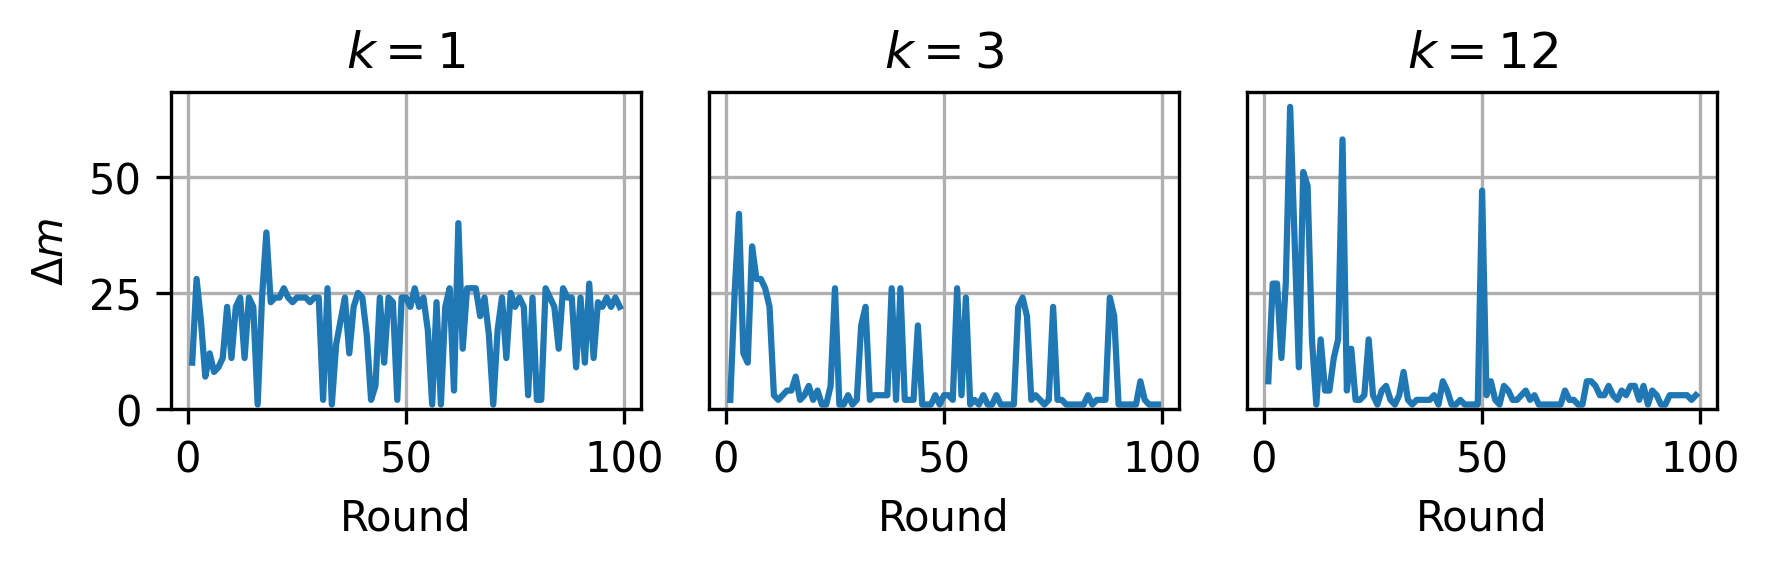

In [14]:
figura4(trial=10, to_file=True)

---

# Figure 5 <a class="anchor" id="fig5"></a>

([Back to top](#top))

Average of the predictions vs. ~round for each model with $k\,{=}\,1,3,12$.

In [15]:
def figura5(trial=0, to_file=False):
    df1 = P.leer_datos([12],[1],[100],[100], 
                       verb=False,muchos=False,cola=False,espejos=False)
    df1['Prediccion_lag'] = df1.groupby(['Identificador','Agente'])['Prediccion'].transform('shift',1)
    df1['Attendance'] = df1.groupby(['Identificador','Ronda'])['Estado'].transform('sum')
    # df1.head()
    df12 = P.leer_datos([12],[3],[100],[100], 
                        verb=False,muchos=False,cola=False,espejos=False)
    df12['Prediccion_lag'] = df12.groupby(['Identificador','Agente'])['Prediccion'].transform('shift',1)
    df12['Attendance'] = df12.groupby(['Identificador','Ronda'])['Estado'].transform('sum')
    # df12.head()    
    df13 = P.leer_datos([12],[12],[100],[100], 
                        verb=False,muchos=False,cola=False,espejos=False)
    df13['Prediccion_lag'] = df13.groupby(['Identificador','Agente'])['Prediccion'].transform('shift',1)
    df13['Attendance'] = df13.groupby(['Identificador','Ronda'])['Estado'].transform('sum')
    # df13.head()    
    # Filtering dataframes for trial
    ids = list(df1['Identificador'].unique())
    ident = ids[trial]
    dfA = pd.DataFrame(df1[df1['Identificador'] == ident])
    ids = list(df12['Identificador'].unique())
    ident = ids[trial]
    dfB = pd.DataFrame(df12[df12['Identificador'] == ident])
    ids = list(df13['Identificador'].unique())
    ident = ids[trial]
    dfC = pd.DataFrame(df13[df13['Identificador'] == ident])
    # Obtaining variables to draw
    dfAp = dfA.groupby('Ronda')['Prediccion_lag'].apply(lambda x: np.mean(x)).reset_index(name='Av.Prediction')
    dfBp = dfB.groupby('Ronda')['Prediccion_lag'].apply(lambda x: np.mean(x)).reset_index(name='Av.Prediction')
    dfCp = dfC.groupby('Ronda')['Prediccion_lag'].apply(lambda x: np.mean(x)).reset_index(name='Av.Prediction')
    # Plotting
    fig, ax = plt.subplots(1,3, figsize=(6,2), tight_layout=True, dpi=300)
    sns.lineplot(x='Ronda', y='Av.Prediction', data=dfAp, ax=ax[0])
    sns.lineplot(x='Ronda', y='Av.Prediction', data=dfBp, ax=ax[1])
    sns.lineplot(x='Ronda', y='Av.Prediction', data=dfCp, ax=ax[2])
    max1 = ax[0].get_ylim()[1]
    max2 = ax[1].get_ylim()[1]
    max3 = ax[2].get_ylim()[1]
    maximo = max(max1, max2, max3)
    ax[0].set_ylim([0,maximo])
#    ax[0].set_ylabel('Absolute difference\nin prediction modes\nfrom active predictors')
    ax[0].set_title('$k=1$')
    ax[0].set_ylabel('Average prediction')
    ax[0].set_xlabel('Round')
    ax[0].grid()
    ax[0].axhline(60, ls='--', color='red', linewidth=.5)
    ax[1].set_title('$k=3$')
    ax[1].set_ylim([0,maximo])
    ax[1].set_ylabel('')
    ax[1].set_xlabel('Round')
    ax[1].tick_params(labelleft=False, left=False)
    ax[1].grid()
    ax[1].axhline(60, ls='--', color='red', linewidth=.5)
    ax[2].set_title('$k=12$')
    ax[2].set_ylim([0,maximo])
    ax[2].set_ylabel('')
    ax[2].set_xlabel('Round')
    ax[2].tick_params(labelleft=False, left=False)
    ax[2].grid()
    ax[2].axhline(60, ls='--', color='red', linewidth=.5)
#    fig.suptitle('Difference between 1st and 2nd\nmost frequent predictions', fontsize=10)
    if to_file:
        plt.savefig('Figura5.png', dpi=300)
        print("Imagen guardada!")

Imagen guardada!


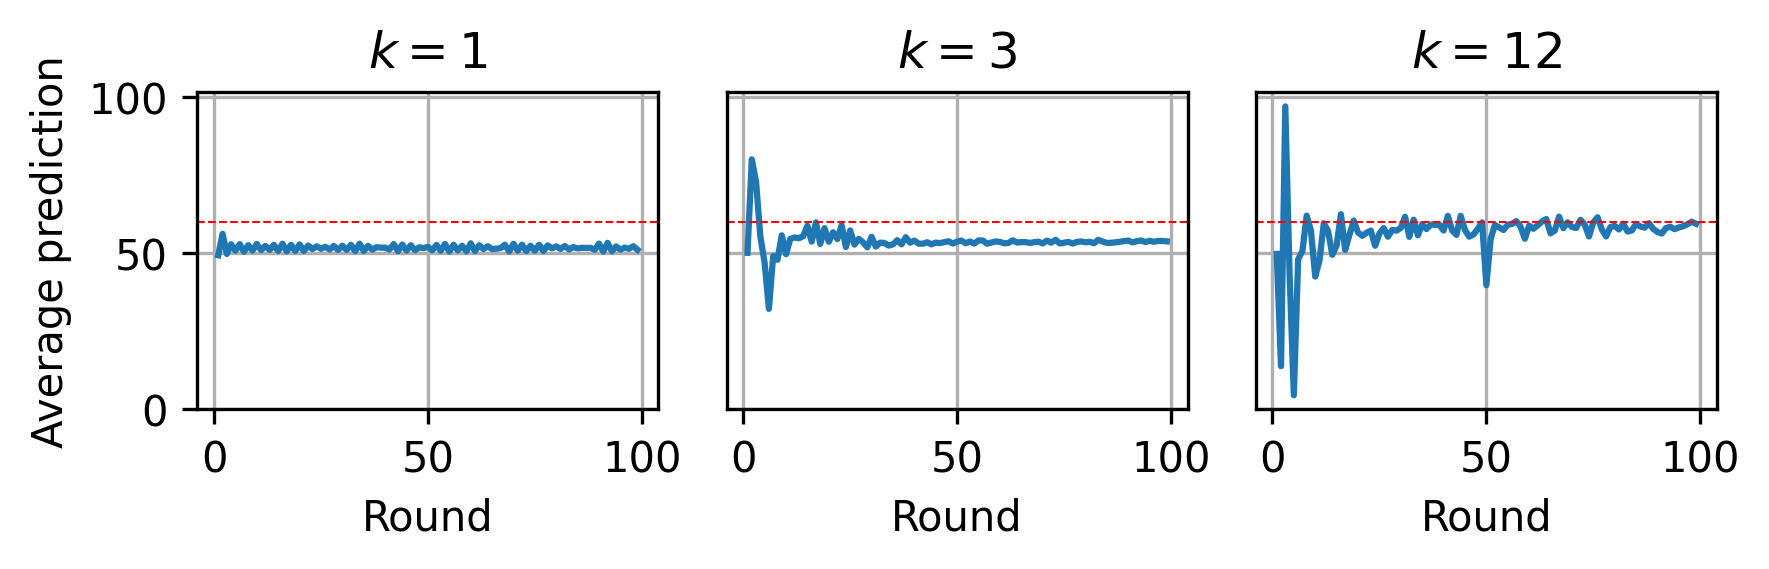

In [16]:
figura5(trial=10, to_file=True)

---

# Figure 6 <a class="anchor" id="fig6"></a>

([Back to top](#top))

Distribution of predictions $s(t)$ of the active predictors of the agents por each $k$.

In [34]:
def figura6(to_file=False):
    K = [1,3,6,9,12]
    data = P.leer_datos([12], K, [100], [100], 
                       verb=False,muchos=False,cola=False,espejos=False)
    trial=10
    r_ini=84
    inicial = True
    fig, ax = plt.subplots(1,5, figsize=(10,2), tight_layout=True, dpi=300)
#    fig.suptitle(f'Distribution of predictions from active predictors')#, fontsize=14)
    for i, k in enumerate(K):
        df = pd.DataFrame(data[data['Num_predic'] == k])
        ids = list(df['Identificador'].unique())
        ident = ids[trial]
        df = pd.DataFrame(df[df['Identificador'] == ident])
        df = pd.DataFrame(df[df['Ronda'] == r_ini])
        sns.histplot(x='Prediccion', data=df, kde=True, ax=ax[i], bins=50)
        ax[i].set_ylim([0,50])
        ax[i].set_xlim([0,100])
        ax[i].set_xlabel('Prediction')
        ax[i].axvline(60, ls='--', color='red')
        ax[i].set_title(f'k={k}')
        if not inicial:
            ax[i].set_ylabel('')
            ax[i].tick_params(labelleft=False, left=False)
        inicial = False
    if to_file:
        plt.savefig(f'Figura6.png', dpi=300)
        print("Imagen guardada!")    


Imagen guardada!


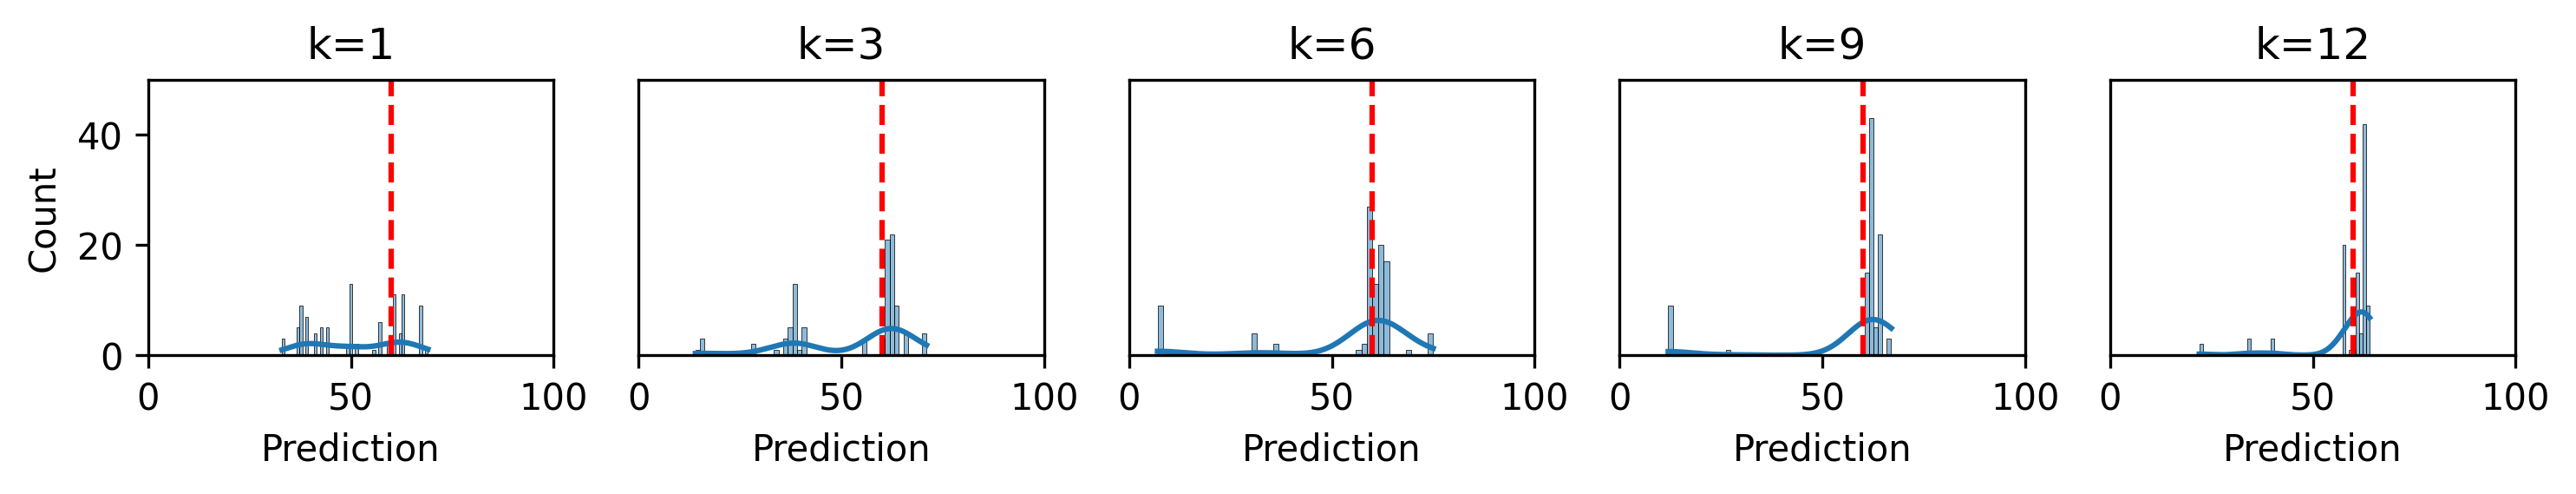

In [35]:
figura6(to_file=True)

---

# Figure 7 <a class="anchor" id="fig7"></a>

([Back to top](#top))

Shared active predictor frequency and reduction in the number of active predictors. In the left panel we can see the shared active predictor histograms for the first round, in which the $x$-axis represents the number of agents ($n$) and the $y$-axis represents, for each $n$, the frequency of trials in which $n$ agents used the same active predictor. Each datapoint is one active predictor in the first round of one of the 100 trials of the simulations with $k\,{=}\,1, 12$ ($N\,{=}\,8452$). In the center panel we see the same histograms corresponding to the last round of the simulation ($N\,{=}\,5502$). In the right panel, the $x$-axis is the number of predictors in each agent's pool ($k$) and the $y$-axis is the total number of active predictors in the population in a round.

In [10]:
def figura7(to_file=False):
    # Create plots
    fig, ax = plt.subplots(1,3, figsize=(7,2.2), tight_layout=True, dpi=300)
    # Data for left plot
    data = P.leer_datos([12],[1],[100],[100],
                    verb=False,muchos=False,cola=False,espejos=False)
    data1 = pd.DataFrame(data[data.Ronda == 0])
    dfA = data1.groupby(['Identificador','Ronda'])['Politica'].value_counts().reset_index(name='Conteo')
    dfA['Model'] = 'k=1'
    data = P.leer_datos([12],[12],[100],[100],
                        verb=False,muchos=False,cola=False,espejos=False)
    data2 = pd.DataFrame(data[data.Ronda == 0])
    dfB = data2.groupby(['Identificador','Ronda'])['Politica'].value_counts().reset_index(name='Conteo')
    dfB['Model'] = 'k=12'
    df = pd.concat([dfA,dfB])
    print('Number of datapoints left panel', df.shape[0])
    datosK1 = pd.DataFrame(df[df.Model == 'k=1']['Conteo'])
    datosK12 = pd.DataFrame(df[df.Model == 'k=12']['Conteo'])
    # Leftmost plot
    sns.histplot(datosK1, 
                 ax=ax[0], 
                 bins=50, 
                 log_scale=(False, True), 
                 binwidth=2,
                 palette=sns.color_palette("hls", 1)
                )
    sns.histplot(datosK12, 
                 ax=ax[0], 
                 bins=50, 
                 log_scale=(False, True),
                 palette=sns.color_palette("tab10", 1)
                )
    topbar = plt.Rectangle((0,0),1,1,fc=sns.color_palette("hls")[0], edgecolor = 'none')
    bottombar = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab10")[0],  edgecolor = 'none')
    ax[0].legend([bottombar, topbar], ['k=12', 'k=1'], loc='upper right', ncol = 1, prop={'size':10})
    ax[0].set_xlabel('$n$')
    ax[0].set_ylabel('Frecuency of $n$ agents\nsharing the same active\n predictor during a round')
    ax[0].set_xlim(0,40)
    ax[0].set_ylim(0,80000)
    ax[0].set_title('Initial\ndistribution')
    # Data for center plot
    data = P.leer_datos([12],[1],[100],[100],
                    verb=False,muchos=False,cola=True,espejos=False)
    data1 = pd.DataFrame(data[data.Ronda == max(data.Ronda)])
    dfA = data1.groupby(['Identificador','Ronda'])['Politica'].value_counts().reset_index(name='Conteo')
    dfA['Model'] = 'k=1'
    data = P.leer_datos([12],[12],[100],[100],
                        verb=False,muchos=False,cola=True,espejos=False)
    data2 = pd.DataFrame(data[data.Ronda == max(data.Ronda)])
    dfB = data2.groupby(['Identificador','Ronda'])['Politica'].value_counts().reset_index(name='Conteo')
    dfB['Model'] = 'k=12'
    df = pd.concat([dfA,dfB])
    print('Number of datapoints center panel', df.shape[0])
    datosK1 = pd.DataFrame(df[df.Model == 'k=1']['Conteo'])
    datosK12 = pd.DataFrame(df[df.Model == 'k=12']['Conteo'])
    # Center plot
    sns.histplot(datosK1, 
                 ax=ax[1], 
                 bins=50, 
                 log_scale=(False, True), 
                 binwidth=2,
                 palette=sns.color_palette("hls", 1)
                )
    sns.histplot(datosK12, 
                 ax=ax[1], 
                 bins=50, 
                 log_scale=(False, True),
                 palette=sns.color_palette("tab10", 1)
                )
    topbar = plt.Rectangle((0,0),1,1,fc=sns.color_palette("hls")[0], edgecolor = 'none')
    bottombar = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab10")[0],  edgecolor = 'none')
    ax[1].legend([bottombar, topbar], ['k=12', 'k=1'], loc='upper right', ncol = 1, prop={'size':10})
    ax[1].set_xlabel('$n$')
    ax[1].set_ylabel('')
    ax[1].tick_params(labelleft=False, left=False)
    ax[1].set_title('Last round')
    ax[1].set_xlim(0,40)
    ax[1].set_ylim(0,80000)
    # Data for rightmost plot
    data = P.leer_datos([12],[1,3,6,9,12],[100],[100],
                    verb=False,muchos=False,cola=True,espejos=False)
    df = data.groupby(['Num_predic','Identificador','Ronda'])['Politica'].nunique().reset_index(name='Num_pred_act')
    # Rightmost plot
    sns.boxplot(x='Num_predic',y='Num_pred_act',data=df,ax=ax[2])
    # ax[2].set_xticks([1,3,6,9,12])
    # ax[1].set_title('# predictors vs\n# active predictors')
    ax[2].set_xlabel('$k$')
    ax[2].set_ylabel('# active predictors')
    ax[2].set_title('Last 20 rounds')
    if to_file:
        plt.savefig('Figura7.png', dpi=300)
        print("Imagen guardada!")


Number of datapoints left panel 8452
Number of datapoints center panel 5502
Imagen guardada!


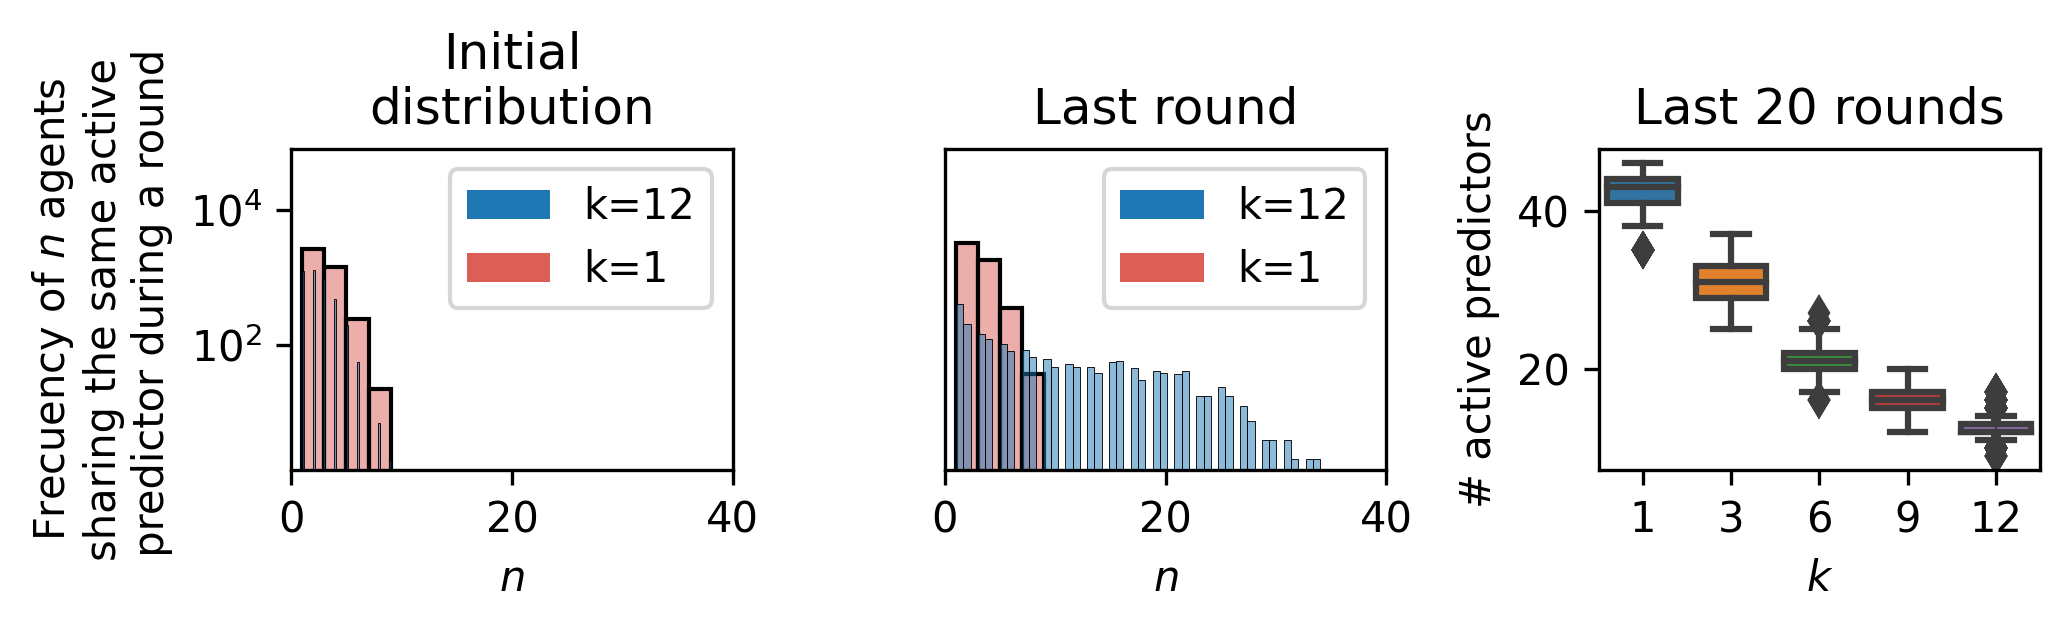

In [11]:
figura7(to_file=True)

---

# Figure 8 <a class="anchor" id="fig8"></a>

([Back to top](#top))

\texttt{Inaccuracy} of the active predictors with respect to the parameters $w$ and $f$. Top panels: The distribution of the \texttt{Inaccuracy} of the active predictors for continuous (left panel) and cyclic (right panel) types with respect to the values of their parameters $w$ and $f$. The width of the boxes encodes the number of predictors of the respective $w$ and $f$. The data correspond to the last 20 rounds of an arbitrary trial. Bottom panels: Distribution of predictions for continuous (left panel) and cyclic (right panel) types of predictors with respect to the values of their parameters $w$ and $f$, respectively.

In [62]:
def figura8(trial=10, to_file=False):

    def tipo_pred(x):
        s = x.split('-')
        ventana = s[0]
        tipo = s[1]
        if len(s) == 3:
            espejo = 'Yes'
        else:
            espejo = 'No'
        return ventana, tipo, espejo

    def sample_continuous_windows():
        # Create random sample of histories
        histories = [int(x) for x in np.random.random_sample(12) * 101]
        # Create list of dataframes
        list_dataframes = []
        for w in range(1, 13):
            # For each window size
            avgs = []
            # Create all possible windows from history
            possible_windows = list(combinations(histories, w))
            for window in possible_windows:
                # for each of these windows, append average
                avgs.append(np.mean(window))
            df = pd.DataFrame({'prediction':avgs})
            df['w'] = w
            list_dataframes.append(df)
        return pd.concat(list_dataframes, ignore_index=True)

    def sample_cyclic_windows():
        # Create random sample of histories
        histories = [int(x) for x in np.random.random_sample(12) * 101]
        # Create list of dataframes
        list_dataframes = []
        for w in range(1, 13):
            # For each window size
            avgs = []
            # Create all possible windows from history
            possible_windows = combinations(histories, int(12 / w))
            for window in possible_windows:
                # for each of these windows, append average
                avgs.append(np.mean(window))
            df = pd.DataFrame({'prediction':avgs})
            df['w'] = w
            list_dataframes.append(df)
        return pd.concat(list_dataframes, ignore_index=True)

    data = P.leer_datos([12],[12],[100],[100],
                    verb=False,muchos=False,cola=True,espejos=False)
    ids = data.Identificador.unique()[trial]
    data = pd.DataFrame(data[data.Identificador==ids])
    data['W'] = data.Politica.apply(lambda x: tipo_pred(x)[0])
    data['W'] = data['W'].astype(int)
    data['Tipo'] = data.Politica.apply(lambda x: tipo_pred(x)[1])
    data['Espejo'] = data.Politica.apply(lambda x: tipo_pred(x)[2])
    df = data[data.Espejo == 'No']
    df1 = df[df.Tipo == 'ventana']
    df2 = df[df.Tipo == 'ciclico']
    # Create plot
    fig, axes = plt.subplots(2, 2, figsize=(6,5), tight_layout=True)
    bins, groups = zip(*df1.groupby('W')['Precision'])
    lengths = np.array([len(group) for group in groups])
    max_width = 0.8
    # Plot top row
    axes[0,0].boxplot(groups, widths=max_width * lengths / lengths.max(),
                patch_artist=True, boxprops={'facecolor': 'lightblue'})
    axes[0,0].set_xticklabels(bins)
    axes[0,0].set_xlabel('$w$')
    axes[0,0].set_ylabel('Inaccuracy')
    axes[0,0].set_ylim([25,29])
#    axes[0,0].set_xlim([0,11])
    axes[0,0].set_title('Continuous')
#    axes[0,0].grid()
    bins, groups = zip(*df2.groupby('W')['Precision'])
    lengths = np.array([len(group) for group in groups])
    max_width = 0.8
    axes[0,1].boxplot(groups, widths=max_width * lengths / lengths.max(),
                patch_artist=True, boxprops={'facecolor': 'lightblue'})
    axes[0,1].set_xticklabels(bins)
    axes[0,1].set_xlabel('$f$')
#    axes[0,1].set_ylabel('Inaccuracy')
    axes[0,1].set_ylim([25,29])
#    axes[0,1].set_xlim([0,11])
    axes[0,1].set_title('Cyclic')
    axes[0,1].set_ylabel('')
#    axes[0,1].grid()
    axes[0,1].tick_params(labelleft=False)
    # Plot bottom row
    df = sample_continuous_windows()
    sns.boxplot(x='w', y='prediction', data=df, ax=axes[1,0])
    axes[1,0].set_xlabel('$w$')
    axes[1,0].set_ylabel('Prediction')
    axes[1,0].set_ylim([0,100])
    df = sample_cyclic_windows()
    sns.boxplot(x='w', y='prediction', data=df, ax=axes[1,1])
    axes[1,1].set_xlabel('$f$')
    axes[1,1].set_ylabel('')
    axes[1,1].set_ylim([0,100])
    axes[1,1].tick_params(labelleft=False, left=False)
    if to_file:
        plt.savefig('Figura8.png', dpi=300)
        print("Imagen guardada!")

Imagen guardada!


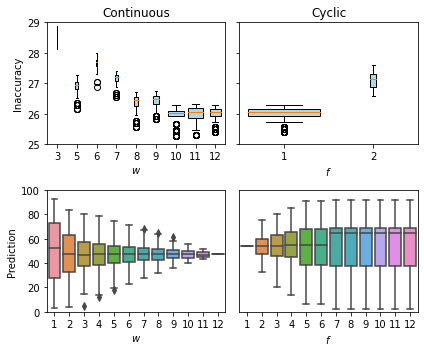

In [63]:
figura8(to_file=True)

---

## Figure 9 <a class="anchor" id="fig9"></a>

([Back to top](#top))

Comparison between original model and the gaussian threshold model.

In [2]:
def figura9(degrees=0, to_file=False):
    comp1 = '# of predictors (k)'
    variables = ['Attendance', 'Efficiency', 'Inaccuracy', 'Deviation']
    sweep1 = P.leer_datos([12],[1,3,6,9,12],[100],[100],[0.4],
                    verb=False,muchos=False,cola=True,espejos=False)
    sweep1['Modelo'] = sweep1['Num_predic']
    data = P.merge_modelos(sweep1)
    print(data.head())
    size = 2.2
    fig, ax = plt.subplots(1,4, figsize=(size*4,size), tight_layout=True, dpi=300)
    for i, v in enumerate(variables):
        sns.lineplot(x='Modelo',y=v,data=data,ax=ax[i],err_style="bars",ci=95)
        ax[i].set_ylabel(v)
        ax[i].set_xlabel(comp1)
        ax[i].tick_params(labelrotation=degrees)
        ax[i].set_xticks([1,3,6,9,12])
        ax[i].set_title(v + ' (d=12)')
        ax[i].grid()
    if to_file:
        plt.savefig('Figura9.png', dpi=300)
        print("Imagen guardada!")


   Efficiency  Inaccuracy  Identificador  Modelo  Attendance  Deviation
0      0.2900   20.455486              0       1      0.6900   0.000000
1      0.4600   10.406844              1       1      0.6000   0.000000
2      0.4305    8.456593              2       1      0.5895   0.002180
3      0.4435    3.050458              3       1      0.5255   0.004976
4      0.3500    9.934188              4       1      0.5900   0.000000
Imagen guardada!


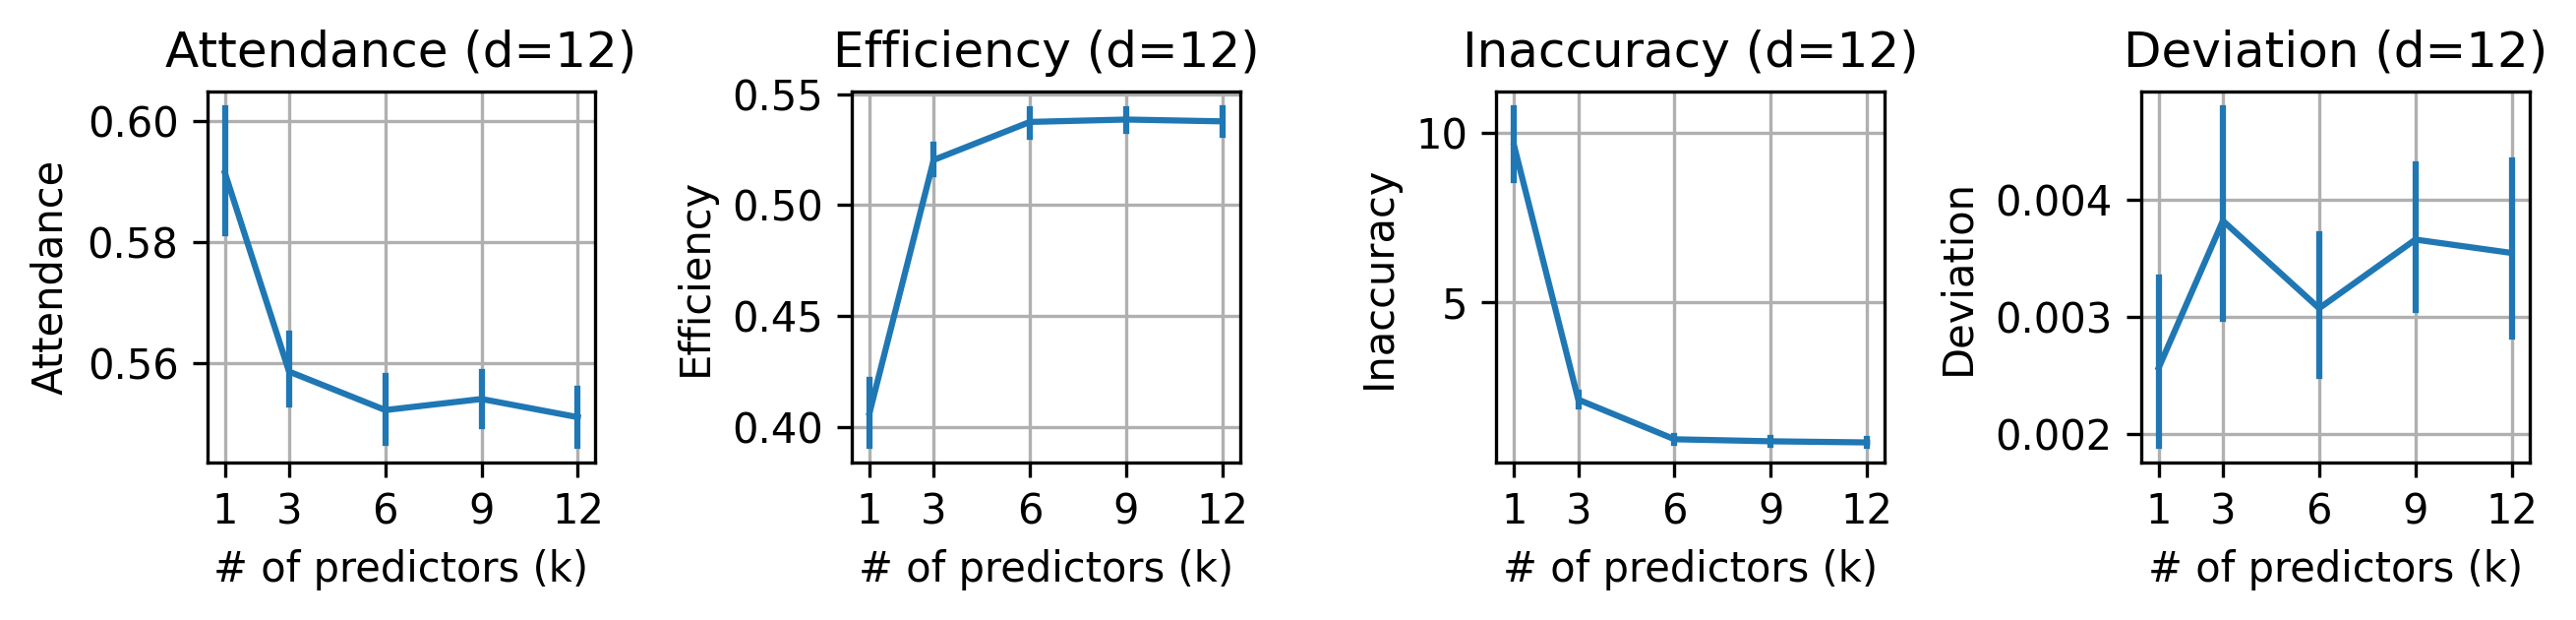

In [3]:
figura9(to_file=True)

In [6]:
df = pd.read_csv('./Data_Farol_Gaussian_Threshold/normal/data_todo/simulacion-12-3-0.4-100-100.csv')